<a href="https://colab.research.google.com/github/psaw/hse-ai24-ml/blob/main/screencast_spectral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Спектральная кластеризация

In [ ]:
from sklearn.datasets import make_circles
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

Сгенерируем датасет из трех концентрических окружностей

<Axes: xlabel='x1', ylabel='x2'>

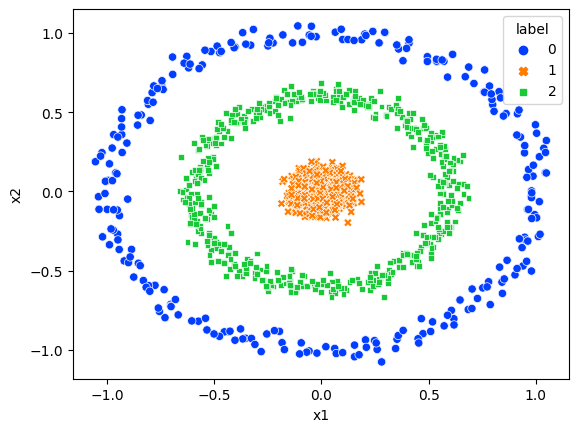

In [ ]:
X_small, y_small = make_circles(n_samples=(250,500), random_state=3, noise=0.04, factor = 0.1)
X_large, y_large = make_circles(n_samples=(250,500), random_state=3, noise=0.04, factor = 0.6)
y_large[y_large==1] = 2

df = pd.DataFrame(np.vstack([X_small,X_large]),columns=['x1','x2'])
df['label'] = np.hstack([y_small,y_large])
df.label.value_counts()
sns.scatterplot(data=df,x='x1',y='x2',hue='label',style='label',palette="bright")

In [ ]:
x1 = np.expand_dims(df['x1'].values, axis=1)
x2 = np.expand_dims(df['x2'].values, axis=1)
X = np.concatenate((x1,x2), axis=1)
y = df['label'].values

Применим K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


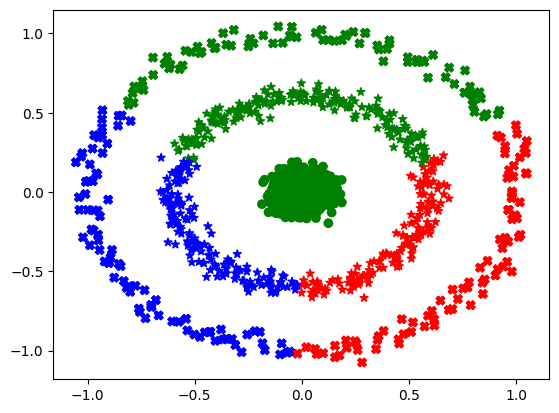

In [ ]:
from sklearn.cluster import KMeans

clustering = KMeans(n_clusters = 3).fit(X)

colors = ['r','g','b']
colors = np.array([colors[label] for label in clustering.labels_])
plt.scatter(X[y==0, 0], X[y==0, 1], c=colors[y==0], marker='X')
plt.scatter(X[y==1, 0], X[y==1, 1], c=colors[y==1], marker='o')
plt.scatter(X[y==2, 0], X[y==2, 1], c=colors[y==2], marker='*')
plt.show()

Применим спектральную кластеризацию

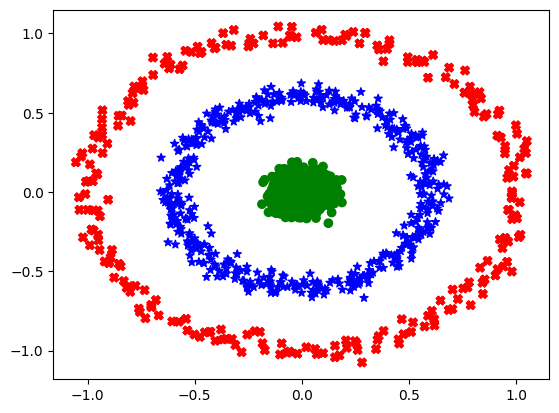

In [ ]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(n_clusters=3, gamma=100).fit(X)

colors = ['r','g','b']
colors = np.array([colors[label] for label in clustering.labels_])
plt.scatter(X[y==0, 0], X[y==0, 1], c=colors[y==0], marker='X')
plt.scatter(X[y==1, 0], X[y==1, 1], c=colors[y==1], marker='o')
plt.scatter(X[y==2, 0], X[y==2, 1], c=colors[y==2], marker='*')
plt.show()